In [6]:
import os
import pandas as pd

# 设置目录路径
directory_path = '/home/hwxu/Projects/Dataset/PKU/AMIA/Input/raw'

# 检查目录中的所有csv文件并读取它们
files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]
all_dfs = []  # 存储每个文件的DataFrame
admission_id_sets = []

for file in files:
    df = pd.read_csv(os.path.join(directory_path, file))
    admission_id_sets.append(set(df['admission_id']))
    all_dfs.append(df)

# 找到所有csv文件中admission_id的交集
admission_id_intersection = set.intersection(*admission_id_sets)

# 初始化最终DataFrame为第一个过滤后的DataFrame
final_df = all_dfs[0][all_dfs[0]['admission_id'].isin(admission_id_intersection)]

# 从第二个DataFrame开始合并
for df in all_dfs[1:]:
    df_filtered = df[df['admission_id'].isin(admission_id_intersection)]
    final_df = pd.merge(final_df, df_filtered, on=['admission_id', 'hour'], how='outer')

# 如果你想保存合并后的DataFrame为一个新的CSV文件
final_df.to_csv('/home/hwxu/Projects/Dataset/PKU/AMIA/Input/processed/data_merged.csv', index=False)


In [7]:
import pandas as pd
# 读取上传的CSV文件
file_path = '/home/hwxu/Projects/Dataset/PKU/AMIA/Input/processed/data_merged.csv'
df = pd.read_csv(file_path)

# 计算每个患者的记录数量
record_counts = df['admission_id'].value_counts()

# 筛选出记录数大于等于4的患者的admission_id
admission_ids_with_enough_records = record_counts[record_counts >= 4].index

# 根据筛选结果过滤原始DataFrame
filtered_df = df[df['admission_id'].isin(admission_ids_with_enough_records)]

filtered_df.to_csv('/home/hwxu/Projects/Dataset/PKU/AMIA/Input/processed/dataset_filtered.csv', index=False)


In [8]:
from Libs.Utils.preprocessor import fill_missing_values

input_path = '/home/hwxu/Projects/Dataset/PKU/AMIA/Input/processed/dataset_filtered.csv'
output_path = '/home/hwxu/Projects/Dataset/PKU/AMIA/Input/processed/dataset_filled.csv'
fill_missing_values(input_path, output_path)

Processed data saved to /home/hwxu/Projects/Dataset/PKU/AMIA/Input/processed/dataset_filled.csv


In [9]:
from Libs.Utils.preprocessor import reduce_mem_usage

input_path = '/home/hwxu/Projects/Dataset/PKU/AMIA/Input/processed/dataset_filled.csv'
output_path = '/home/hwxu/Projects/Dataset/PKU/AMIA/Input/processed/dataset_reduced.csv'
reduce_mem_usage(input_path, output_path)

Mem. usage decreased to 23.11 Mb (48.7% reduction)
Processed data saved to /home/hwxu/Projects/Dataset/PKU/AMIA/Input/processed/dataset_reduced.csv


In [15]:
import matplotlib.pyplot as plt
import pandas as pd

ts = pd.read_csv('/home/hwxu/Projects/Dataset/PKU/AMIA/Input/processed/dataset_reduced.csv')
ts

,admission_id,hour,dobutamine,epinephrine,norepinephrine,phenylephrine,vasopressin,pulse,bilirubin_direct,bilirubin_total,...,ast,alt,paco2,gcs,albumin,hemoglobin,wbc,troponin_i,troponin_t,ck_mb
0,20019875,43.0,27.724768,0.627451,0.139182,0.882353,0.9,80.333336,0.4,0.6,...,31.0,36.0,55.0,3.0,3.0,6.6,21.200000,NaN,0.53,15.0
1,20019875,44.0,27.724768,0.366667,0.730213,0.882353,0.9,79.666664,0.4,0.6,...,31.0,36.0,51.0,3.0,3.0,6.6,19.683332,NaN,0.53,15.0
2,20019875,45.0,27.724768,0.105882,0.440599,0.882353,0.9,80.500000,0.4,0.6,...,31.0,36.0,47.0,3.0,3.0,6.6,18.166666,NaN,0.53,15.0
3,20019875,46.0,27.724768,0.154902,0.150985,0.882353,0.9,80.000000,0.4,0.6,...,31.0,36.0,44.0,3.0,3.0,6.6,16.650000,NaN,0.53,15.0
4,20019875,47.0,27.724768,0.152629,0.564643,0.882353,0.9,81.000000,0.4,0.6,...,31.0,36.0,41.0,3.0,3.0,6.6,15.133333,NaN,0.53,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155299,29527188,7.0,19.461079,1.014254,0.052674,0.441176,9.4,84.000000,3.2,8.2,...,63.0,81.0,50.0,15.0,3.4,9.3,6.800000,NaN,0.14,4.0
155300,29731621,4.0,19.461079,1.014254,0.052674,0.441176,9.4,84.000000,3.2,8.2,...,63.0,81.0,50.0,15.0,3.4,9.3,6.800000,NaN,0.59,15.0
155301,29887864,18.0,19.461079,1.014254,0.052674,0.441176,9.4,84.000000,3.2,8.2,...,63.0,81.0,50.0,15.0,3.4,9.3,6.800000,NaN,1.37,5.0
155302,29906888,349.0,19.461079,1.014254,0.052674,0.441176,9.4,84.000000,3.2,8.2,...,63.0,81.0,50.0,15.0,3.4,9.3,6.800000,NaN,2.15,2.0


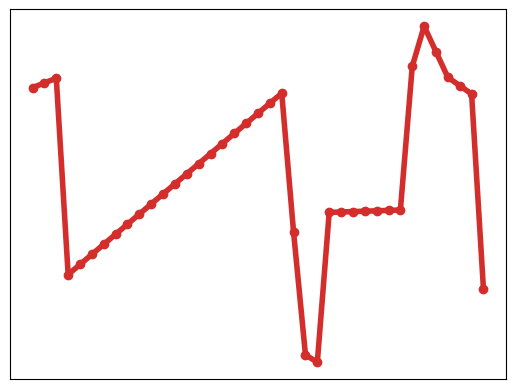

In [33]:
y = ts[ts['admission_id'] == 29887864]['hemoglobin']
x = range(len(y))

plt.plot(x, y, linewidth=4, c='#d32e2c')  # 加粗线条
plt.scatter(x, y, c='#d32e2c')
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)  # 去掉刻度

plt.show()